<a href="https://colab.research.google.com/github/abernauer/Deep-Learning-with-Python/blob/master/Chapter2_building_blocks_of_neural_nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1 A first look at a neural network

In [ ]:
from keras.datasets import mnist
(train_images, train_lables), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


 *Training data*

In [ ]:
train_images.shape


(60000, 28, 28)

In [ ]:
len(train_lables)

60000

In [ ]:
train_lables

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

*Testing data*

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

*Network Architechture*

In [ ]:
from keras import models
from keras import layers


In [ ]:
net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
net.add(layers.Dense(10, activation='softmax'))

*compilation step*

* A loss function how we measure our performance on the training data
* An optimizer the mechanism in which, the network will update based on the data and loss function
* Metrics to monitor during testing and training in this case accuracy


*Compilation Step*

In [ ]:
net.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

*Preparing the data*

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

*Preparing the labels*

In [ ]:
from keras.utils import to_categorical

train_lables = to_categorical(train_lables)
test_labels = to_categorical(test_labels)

In [ ]:
net.fit(train_images, train_lables, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.2561 - accuracy: 0.9268
Epoch 2/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.1039 - accuracy: 0.9698
Epoch 3/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.0680 - accuracy: 0.9793
Epoch 4/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.0501 - accuracy: 0.9851
Epoch 5/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.0378 - accuracy: 0.9890


The quantities displayed above are the loss and accuracy of the training. 


In [ ]:
test_loss, test_acc = net.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 49us/step


In [ ]:
print("test_acc:", test_acc)

test_acc: 0.9811999797821045


#2.2 Data representations for neural networks

The data in the previous example was stored in a multidimensional Numpy array or *tensors*

A simple explanation of a tensor is a container for data--primarily numeric data. In the context of tensors a *dimension* is often called an *axis*.

# 2.2.1 Scalars (0D tensors)

A 0D tensor containing a only one number is called a *scalar*

In Numpy, a float32 or float64 number is a scalar tensor. The number of axes of a tensor is called it's *rank*.

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

#2.2.2 Vectors (1D tensors)

*Vector* or 1D tensor is an array of numbers.

A 1D tensor has exactly one axis.

In [ ]:
x = np.array([12, 3, 6, 14, 7])

In [ ]:
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

A vector with five entries or elements is a *5-dimensional vector*.
*Dimensionality* can denote the number of entries or elements along a specific axis or the number of axis in a tensor. So a 5D tensor would be a *tensor of rank 5*.


#2.2.3 Matrices (2D tensors)

An array of vectors is a *matrix*, or 2D tensor. A matrix has two axes referred to as *rows* and *columns*.
A visual interpretation of a matrix as a rectangular grid of numbers.

In [ ]:
x = np.array( [[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]])

In [ ]:
x.ndim

2

The entries from the first axis are called the *rows*, and the elements from the second axis are called the *columns*. [5, 78, 2, 34, 0] is the first row of x and [5, 6, 7] is the first column.

#2.2.4 3D tensors and higher-dimensional tensors

If we pack a matrix in a new array, you obtain a 3D tensor, which you can visually interpret as a cube of numbers. 

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]]])

In [ ]:
x.ndim

3

Packing 3D tensors in an arrray, you create a 4D tensor. 

#2.2.5 Key attributes 

A tensor is defined by three key attributes:

* *Number of axes (rank)*--For instance, a 3D tensor has three axes, and a matrix has two axes.

* *Shape*-- This is a tuple of intergers that describes how many dimensions the tensor has along each axis.

* *Data type* (called dtype in Python libraries)--This is the type of the data contained in the tensor.

To drive home the point on data we can examine the mnist data.

In [ ]:
from  keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

We display the number of axes of the tensor train_images



In [ ]:
print(train_images.ndim)

3


The shape

In [ ]:
print(train_images.shape)

(60000, 28, 28)


And the tensor's data type.

In [ ]:
print(train_images.dtype)

uint8


So our data is a 3D tensor of 8-bit integers. Or an array of 60,000 matrices of 28 x 28 integers. Each matrix being greyscale, with coefficients between 0 and 255.

We can display the fourth digit with matplot lib.

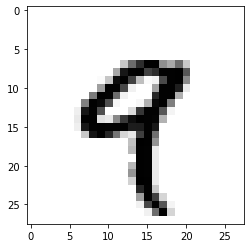

In [ ]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#2.2.6 Manipulating tensors in Numpy

Selecting specific elements in a tensor is called *tensor slicing* . It was performed with train_imgages[i] syntax.

The following example selecs digits #10 to #100 (#100 isn't included) and puts them in array of shape (90, 28, 28):

In [ ]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In general, you may select between any two indices along each tensor axis.  For instance in order to select 14 X 14 pixels centered in the middle, you do this:

In [ ]:
my_slice = train_images[:, 14:, 14:]

It's also possible to use negative indices. To crop patches of pixels out of an image.

In [ ]:
my_slice = train_images[:, 7:-7, 7:-7]

# 2.2.7 The notion of data batches

In general, the first axis(axis 0, because indexing starts at 0) in all data tensor you'll come across in deep learning will be the *samples axis* (sometimes called the *samples dimension*). In the MNIST example samples are images of digits.

In addition, deep-learning models don't process an entire dataset at once; rather, they break the data into small batches. Concretely, here's one batch of our MNIST digits with the batch size of 128:

In [ ]:
batch = train_images[:128]

And the next batch.

In [ ]:
batch = train_images[128:256]

And the nth batch:

batch = train_images[128 * n:128 * (n + 1]

When considering such a batch tensor, the first axis (axis 0) is called the *batch axis* or *batch dimension*. This is a term you'll frequently encounter when using Keras and other deep-learning libraries.

#2.2.8 Real-world examples of data tensors

* *Vector data* -- 2D tensors of shape (samples, features)
* *Timeseries data or sequence data* -- 3D tensors of shape (samples, timesteps, features)
* *Images* -- 4D tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)

#2.2.9 Vector data 

This is the most common case. In such a dataset, each single data point can be encoded as a vector, and thus a batch of data will be encoded as a 2D tensor, where the first axis is the *samples axis* and the second axes is the *feature axis*.
Two examples:

* An actuarial dataset of people, where we consider each person's age, ZIP code, and income. Each person can be characterized as a vector of 3 values, and thus an entire dataset of 100,000 people can be stored in a 2D tensor of shape (1000000, 3)

* A dataset of text documents, where we represent each document by the counts of how many times each word appears in it ( out of a dictionary of 20,000 words). Each document can be encoded as a vector of 20,000 values (one count per word in the dictionary), and thus an entire dataset of 500 documents can be stored in a tensor of shape (500, 20000).

#2.2.10 Timeseries data or sequence data 

Whenever time matters in your data (or the notion of sequence order), it makes sense to store it in a 3D tensor with an explicit time axis. Each sample can be encoded as a sequence of vector (a 2D tensor), and thus a batch of data will be encoded as a 3D tensor. The time is always the second axis (axis of index 1) Let's look at some examples:

* A dataset of stock prices. Every minute, we store the current price of the stock, the highest price in the past minute, and the lowest price in the past minute. Thus every minute is encoded as a 3D vector, an entire day of trading is encoded as a 2D tensor of shape (390, 3) (there are 390 minutes in a trading day), and 250 days' worth of data can be stored in a 3D tensor of shape (250, 390, 3). Here, each sample would be one day's worth of data.

* A dataset of tweets, where we encode tweet as a sequence of 280 characters out of an alphabet of 128 unique characters. In this setting, each character can be encoded as a binary vector of size 128( an all-zeros vector except for a 1 entry at the index corresponding to the character). Then each tweet can be encoded as a 2D tensor of shape (280, 128), and a dataset of 1 million twwets can be stored in a tensor of shape (1000000, 280, 128).

#2.2.11 Image data

Images typically have three dimensions: heigth, width, and color depth. Although grayscale images (like our MNIST digits) have only a single color channel and could thus be stored in 2D tensors, by convention image tensors are always 3D, with a one-dimensional color channel for grayscale images. A batch of 128 grayscale images of size 256 x 256 could thus be stored in a tensor of shape (128, 256, 256, 1), and a batch of 128 color images could be stored in a tensor could be stored in a tensor of shape (128, 256, 256, 3)

There are two conventions for shapes of images tensors: the *channel--last* convention (used by TensorFlow) and the *channel-first* convention (used by Theano). The TensorFlow machine-learning framework from Google places the color-depth axis at the end: (samples, height, width, color_depth). Meanwhile, Theano places the color depth axis right after the batch axis: (samples, color_depth, height, width). With the Theano convention, the previous examples would become (128, 1, 256, 256)
and (128, 3, 256, 256). The keras framework provides support for both formats.

#2.2.12 Video data

#2.3 The gears of neural networks: tensor operations

Much as any computer program can be ultimately reduced to a small set of binary operations on binary inputs (AND, OR, NOR, and so on), all transformations learned by deep neural networks can be reduced to a handful of *tensor operations* applied to tensors of numeric data. For instance, it's possible to add tensors, multiply tensors, and so on. 

In our intial example, we were building our network by stacking Dense layers on top of each other. A Keras layer instance looks like this:


```
keras.layers.Dense(512, activation='relu')
```




This layer can be interpreted as a function, which takes as input a 2D tensor and returns another 2D tensor-- a new representation for the input tensor. Specifically, the function is as follows (where W is a 2D tensor and b is a vector, both attributes of the layer):
```
output = relu(dot(W, input) + b)
```
We have three tensor operations here: a dot product(*dot*) between the input tensor and a tensor named *W*; an addittion (+) between the resulting 2D tensor and a vector *b*; and, finally, a *relu* operation relu(x) is max(x, 0)

#2.3.1 Element-wise operations

The *relu* operation and addition are *element-wise* operations: operations that are applied independently to each entry in the tesnors being considered. This means these operations are highly amenable to massivly parrallel implementations(*vectorized* implementations, a term that comes from vector processor supercomputer architecture).

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2

    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

The same for addition:

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape

    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

So, in Numpy, you can do the following element-wise operations, and it will be blasing fast:

```
import numpy as np

z = x + y

z = np.maximum(z, 0.)

```

# 2.3.2 Broadcasting

The naive implementation of *naive_add* only supports the addition of 2D tensors with identical shapes. However the *Dense* layer, we added a 2D tensor with a vector. What happens when the shapes of the tensors added differ?

When possible, the smaller tensor will be *broadcasted* to match the shape of the larger tensor. Broadcasting consists of two steps:

1. Axes (called *broadcast axes*) are add to the smaller tensor to match the *ndim* of the largest tensor.

2. The samller tensor is repeated alongside these new azes to match the full shape of the larger tensor.

Consider X with shape (32, 10) and y with shape (10,). First we add an empty axis to y, whose shape become (1,10). Then, we repeat y 32 times alongside this new axis, so that we end up with a tensor of Y with shape (32, 10), where Y[i, :]==y for i in range(0, 32). At this point, we can proceed to ad X and Y, because they have the same shape. 

In terms of implementation, no new 2D tensor is created, because that would be terribly inefficient. But think of the vector being repeted 10 times alongside a new axis is a helpful mental model.

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]

    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

With broadcasting, you can generally apply two-tensor element-wise operations if one tensor has shape (a, b, ... n, n+1, ...m) and the other shape (n. n+1, ...m). The broadcasting will then automatically happen for axes a through n -1. 

Example of performing an element-wise *maximum* operation to two tensors of different shapes via brodcasting:

In [ ]:
import numpy as np

x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))

z = np.maximum(x, y)

#2.3.3 Tensor dot

The dot operation, also called a *tensor product* (not to be confused with an element wise product). Contrary to element-wise operations, it combines entries in the input tensors. 

An element wise product is perfomed with the * operator in Numpy, Keras, Theano, and TensorFlow. *dot* uses a different syntax in TensorFlow, but in both Numpy and Keras it's done using the standard *dot operator:
```python
import numpy as np
z = np.dot(x,y)
```
In math notation, you would use (.):
```python
z = x .y
```

A naive implementation of the dot product implemented below:

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

Notice the dot product between two vectors is a scalar and that only vectors with the same number of elements are compatible for a dot prouct. 

You can also take a dot product between a matrix x and vector y, which returns a vector where the coefficients are dot products between y and the rows of x. :

In [ ]:
import numpy as np 

def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2 
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]

    z = np.zeroes(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

An alternative approache could reuse the the code from the vector product:

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeroes(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

Note that as soon as one of the two sensors has an *ndim* greater than 1, *dot* is no longer symmetric, which is to say dot(x, y) isn't the same as dot(y, x)

Of course, a dot product generalizes to tensors with an arbritary number of axes. The most common applications may be the dot product between two matrices. 
Here's the naive implementation:

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]

    z = np.zeros((x.shape[0]), y.shape[1])
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

To understand dot-product
to do get photo of matrix multiplication

#2.3.4 Tensor reshaping

A third type of tensor operation that's essential to understand is *tensor reshaping*. Which was used when preproccesed the digits data. :
```
trian_images = trains_images.reshape((60000, 28 * 28)

```
Reshaping a tensor means rearranging its rows and columns to match a target shape. Examples:

In [2]:
import numpy as np
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])

In [3]:
print(x.shape)

(3, 2)


In [4]:
x = x.reshape((6, 1))

In [5]:
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [6]:
x = x.reshape((2, 3))

In [7]:
x

array([[0., 1., 2.],
       [3., 4., 5.]])

A special case of reshaping that's commonly encountered is *transposition*. *Transposing* a matrix means exchanging its rows and its columns, so that x[i, :] becomes [:, i]:

In [9]:
x = np.zeros((300, 20))

In [10]:
x = np.transpose(x)

In [11]:
print(x.shape)

(20, 300)


#2.3.5 Geometric interpretation of tensor operations

Because the contents of the tensors manipulated by tensor operations can be interpreted as coordinates of points in some geometric space, all tensor operations have a geometric interpretation. First example addittion. 

```
A = [0.5, 1]

```
It's a point in a 2D space.

revisit 

 * add figures
 * vector addittion etc.

#2.3.6 A geometric interpretation of deep learning

You just learned that nueral networks consist entirely of chains of tensor operation and that all of these tensor operations are just gemetric transformations of the input data. One could distill a neural network down as a very complex geometric transformation in a high-dimensional space, a long a series of simple steps. 

#2.4 The engine of nueral networks:gradient-based optimization

As you saw in the previous section, each neural layer from our first network example transforms its input data as follows:
````
output = relu(dot(W, input) + b)
````


In the above expression, *W* and *b* are tensors that are attributs of the layer. They're called the *weights* or *trainable parameters* of the layer ( the *kernel* and *bias* attributes, respectively). These weights contain the information learned by the network from exposure to training data. 


Initially, these weight matrices are filled with small random values( a step called *random initialization*) Of course, there's no reason to expect that relu(dot(W, input) + b), when *W* and *b* are randwom, will yield any useful representations. The resulting representations are meaningless--but they're a starting point. What comes next is to gradually adjust these weights, based on a feedback signal. The gradual adjustment, also called *training*, is basically the learning that machine learning is all about. 

This happens within within what's called a *training loop*, which works as follows. Repeat these steps in a loop, as long as necessary:

1. Draw a batch of training samples x and corresponding targets y. 

2. Run the network on x(a step called the *forward pass*) to obtain predictions y_pred.

3. Compute the loss of the network on the batch, a measure of mismatch between y_pred and y.

4. Update all weights of the network in a way that slightly reduces the loss on this batch.


You'll eventually end up with a network that has a very low loss on it's trianing data: a low mismatch between predictions y_pred and expected targets y. The network has "learned" to map its inputs to correct to correct targets.

#2.4.1 What's a derivative?

Consider a continuous, smooth function f(x) = y, mapping a real number x to a new real number y. Because the function is *continuous*, a small change in x can only result in a small change in y-- that's the intuition behind continuity. Let's say you increase x by a small factor epsilon_x: this results in a small epsilon_y change to y:

```
f(x + epsilon_x) = y + epsilon_y
```
In addittion, because the function is *smooth* , when epsilon_x is small enough, around a certain point *p*. it's possible to approximate *f* as a linear function of slope *a*, so that epsilon_y becomes a * epsilon_x:

```
f(x + epsilon_x) = y + a * epsilon_x
```
Obviously, the linear approximation is valid only when x is close enough to *p*

The slope a is called the *derivative* of f in p. If a is negative, it means a small change of x around p will result in a decrease of f(x); and if a is positive, a small chang in x will result in an increase of f(x).

#2.4.2 Derivative of a tensor operation: the gradient


A *gradient* is the derivative of a tensor operation. It's the generalization of derivatives to functions of multidimensional inputs: that is, to functions that take tensors as inputs. 

Consider an input vector *x*, a matrix *W*, a target *y*, and a loss function *loss*. You can use *W* to compute a target candidate y_pred, and comput the loss, or mismatch, between the target candidate y_pred and the target y:

```
y_pred = dot(W, x)
loss_value = loss(y_pred, y)
```

If the data inputs x and y are frozen, then this can be interpreted as a function mapping values of *W* to loss values:
```
loss_value = f(W)
```
Let's say the current value of *W* is *W0*. Then the derivative of f in the point W0 is a tensor gradient(f)(W0) with the same shape as *W*, where each coefficient gradient(f)(wO)[i,j] indicates the direction and magnitude of the change in *loss_value* you observe whe modifying W0[i, j]. That tensor gradient (f)(wO) is the gradient of the function f(W) = loss_value in Wo.

You saw earlier that the derivative of a function f(x) of a single coefficient can be interpreted as the slope of the curve of f. Likewise, gradient(f)(WO) can be interpreted as the tensor describing the curvature of f(W) around W0.

For this reason, in much the same way that, for a function f(x), you can reduce the value of f(x) by moving x a little in the opposite direction from the derivative, with a function f(w) of a tensor, you can reduce f(W) by moving *W* in the opposite direction from the gradient: for example, W1 = W0 - step * gradient(f)(w0) (where step is a small scaling factor). That means going against the curvature, which intuitively should put you lower on the curve.

#2.4.3 Stochastic gradient descent